In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# 1. Importing libraries and datasets

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [4]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
len(train_data.columns)

81

There is quite an impressive number ofcolumns: 81

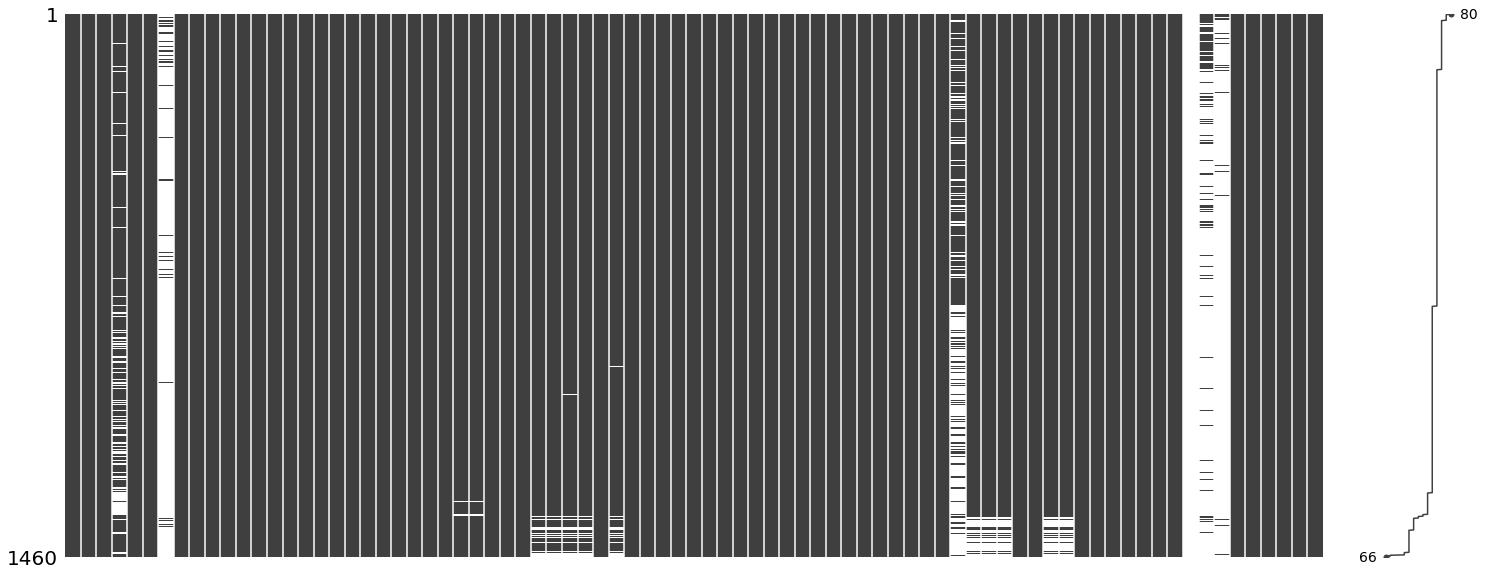

In [6]:
import missingno as msno
#visualising missing values
msno.matrix(train_data, sort='descending')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_data.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


# 2.Target variable: Sales Price
First, let us take a look at the target variable, as it is the one we want to understand and predict

In [9]:
train_data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


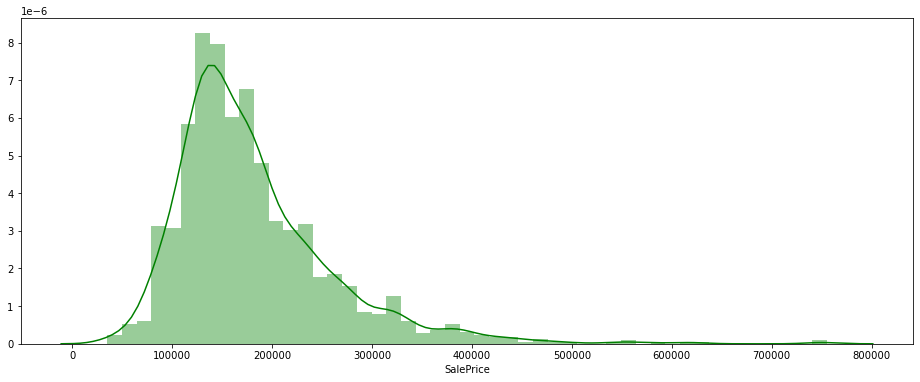

In [10]:
plt.figure(figsize=(16, 6))
sns.distplot(train_data['SalePrice'], color='Green')
#skewness and kurtosis
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

As one would assume, the distribution is not normal. We should perform a log transformation before modelling.

In [11]:
#numerical
numerical_var = train_data.dtypes[train_data.dtypes != "object"].index
print("N. of Numerical features: ", len(numerical_var))

#categorical
categorical_var = train_data.dtypes[train_data.dtypes == "object"].index
print("N. of Categorical features: ", len(categorical_var))

N. of Numerical features:  38
N. of Categorical features:  43


In [12]:
train_data[numerical_var].columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
train_data[categorical_var].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

# 3.Numerical variables

Let us start by taking a look at the numerical variables. Given the amount of the variables, to narrow them down, a good approach might be taking a look at correlation with the target and focusing just on the variables that are more correlated with the target (>0.5).

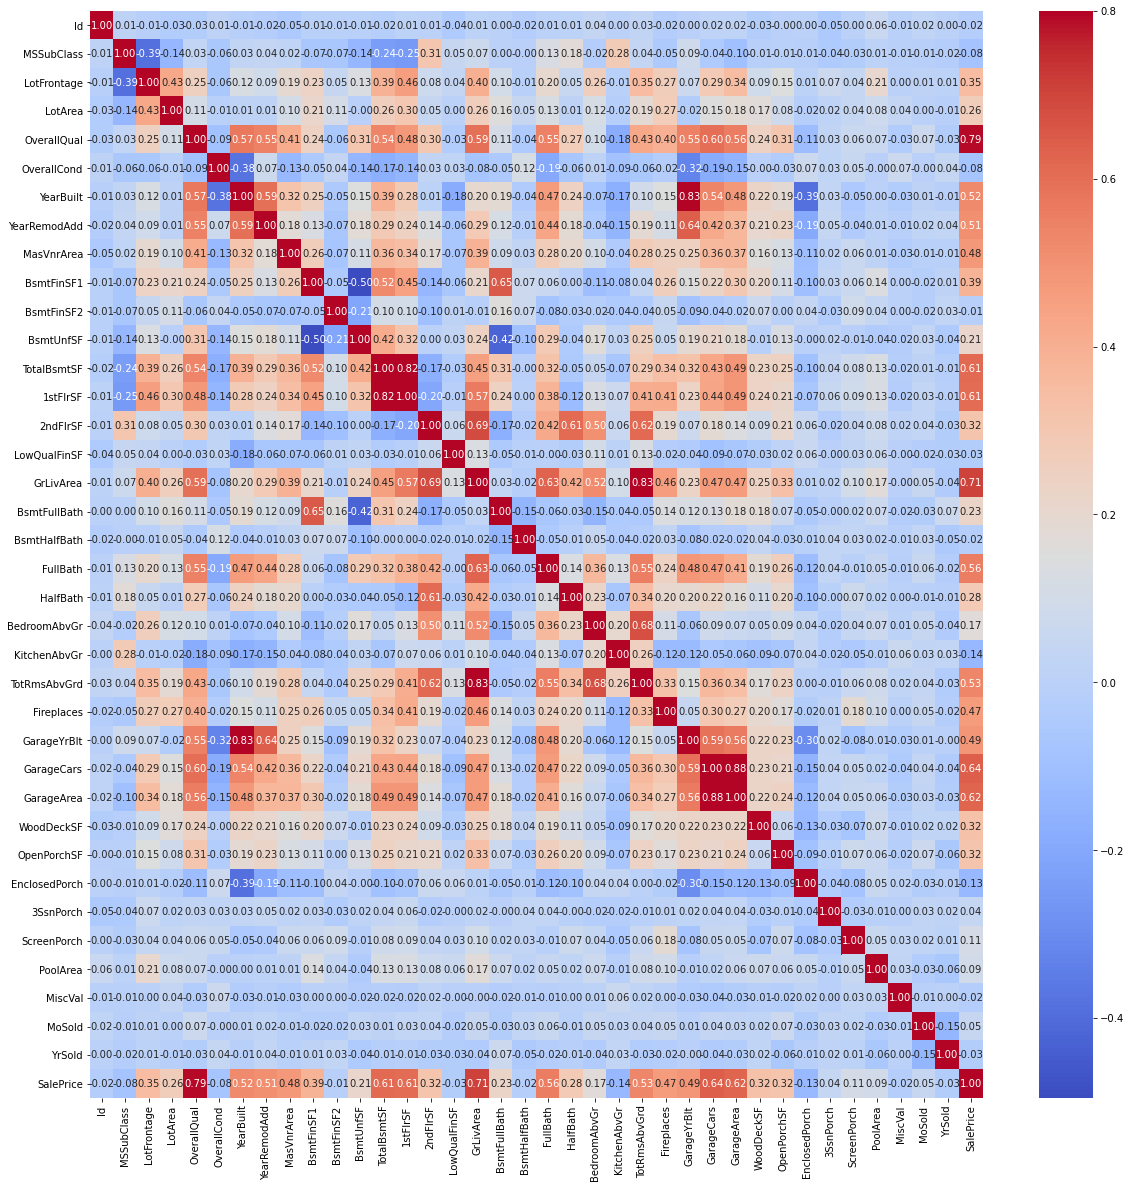

In [14]:
corrmat = train_data[numerical_var].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True,fmt = ".2f",cmap = "coolwarm")

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

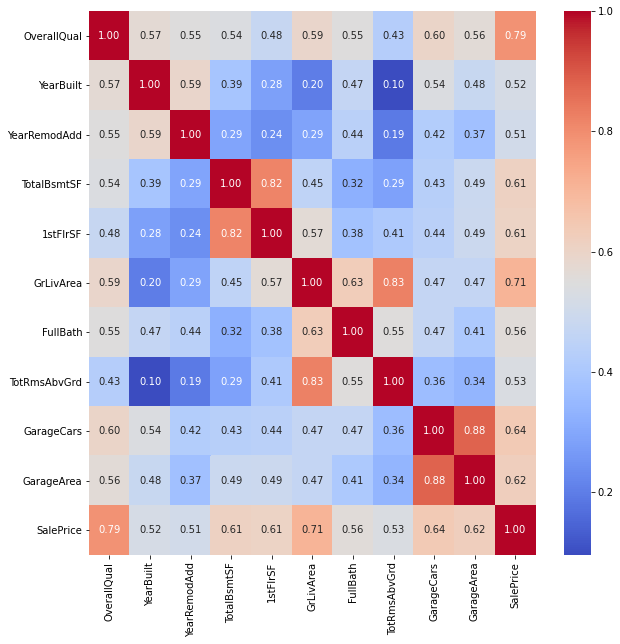

In [15]:
#most corr features
most_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train_data[most_corr_features].corr(),annot=True,fmt = ".2f",cmap = "coolwarm")

most_corr_features

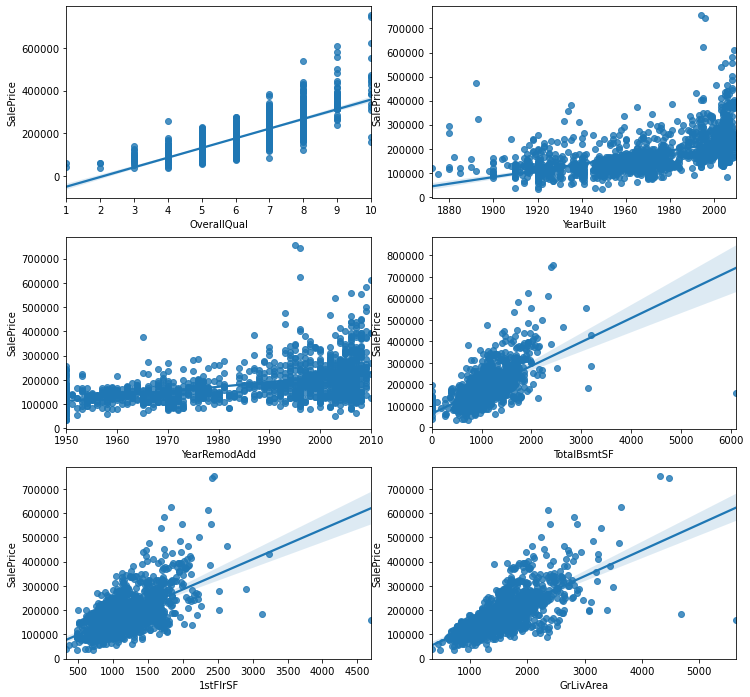

In [16]:
#plotting most correlated features
fig, axes = plt.subplots(3, 2, figsize = (12,12)) 

sns.regplot(ax=axes[0,0], data=train_data,x='OverallQual',y='SalePrice')

sns.regplot(ax=axes[0,1], data=train_data,x='YearBuilt',y='SalePrice')

sns.regplot(ax=axes[1,0], data=train_data,x='YearRemodAdd',y='SalePrice')

sns.regplot(ax=axes[1,1], data=train_data,x='TotalBsmtSF',y='SalePrice')

sns.regplot(ax=axes[2,0], data=train_data,x='1stFlrSF',y='SalePrice')

sns.regplot(ax=axes[2,1], data=train_data,x='GrLivArea',y='SalePrice')

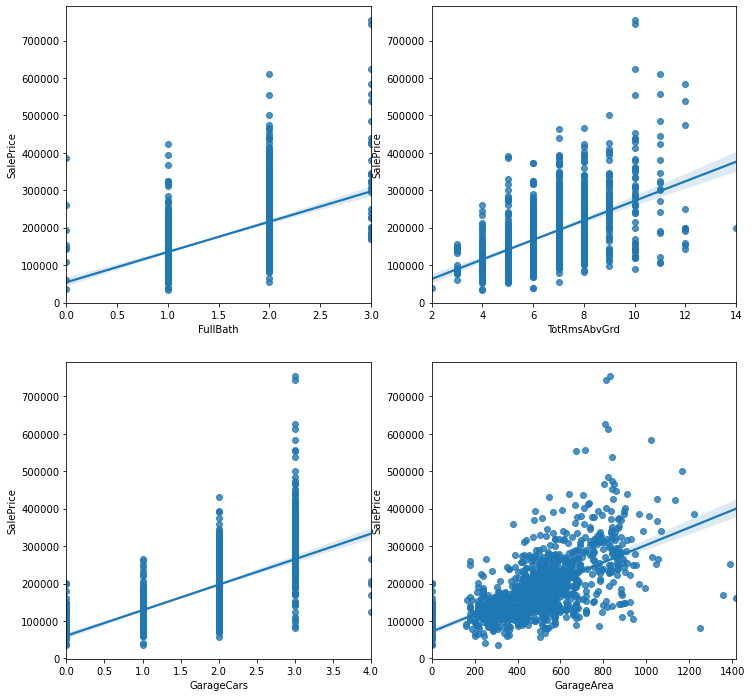

In [17]:
#plotting most correlated features

fig, axes = plt.subplots(2, 2, figsize = (12,12)) 

sns.regplot(ax=axes[0,0], data=train_data,x='FullBath',y='SalePrice',)

sns.regplot(ax=axes[0,1], data=train_data,x='TotRmsAbvGrd',y='SalePrice')

sns.regplot(ax=axes[1,0], data=train_data,x='GarageCars',y='SalePrice')

sns.regplot(ax=axes[1,1], data=train_data,x='GarageArea',y='SalePrice')

We can see that "OverallQual" and "GrLivArea" are the most correlated features. Some features are strongly correlated with each other: "TotalBsmtSF" with "1stFlrSF", "GrLivArea" with "TotRmsAbvGrd" and "GarageCars" with "GarageArea". To avoid multicollinearity, when modelling, we will drop from these couples the variable that is less correlated to the target .


# 4.Categorical Variables
It's time to check how the categorical values relate to the target, However, in order to do so, missing values should be addressed first

In [18]:
#missing data
categorical_var
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603


From the information provided, we know that a lot of missing values are really no missing values. This means that when a house does not have a certain feature, e.g. a pool, it is marked as missing value. So we will map these ones first

In [19]:
#columns where NaN is a value
cols_to_fill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

# filling values
for col in cols_to_fill:
    #train
    train_data[col].fillna('None',inplace=True)
    #test
    test_data[col].fillna('None',inplace=True)

In [20]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
SalePrice,0,0.000000
ExterCond,0,0.000000


The other missing values will be replaced by the means.

In [21]:
# filling with mean for the remaining columns: LotFrontage, GarageYrBlt, MasVnrArea
#train
train_data.fillna(train_data.mean(), inplace=True)
#test
test_data.fillna(test_data.mean(), inplace=True)

Let's take a look at the variables.


In [22]:
train_data[categorical_var].columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

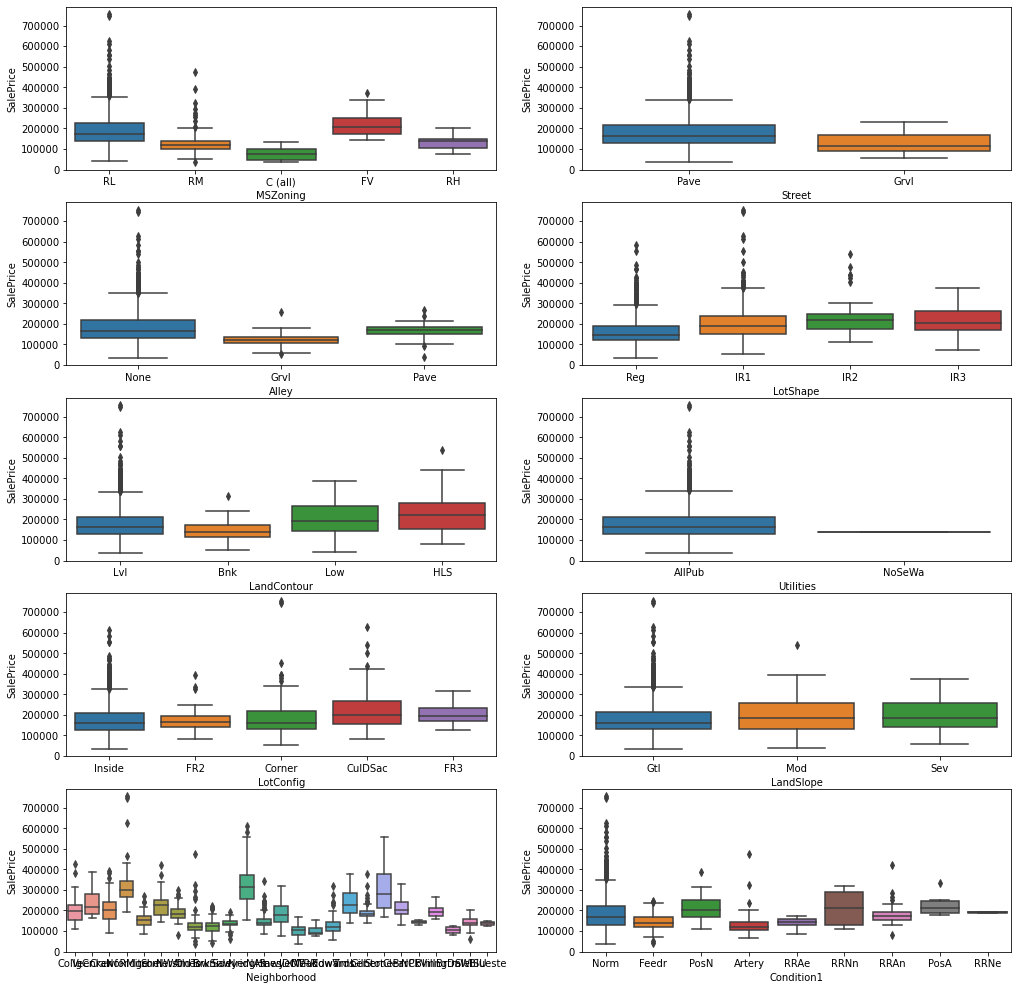

In [23]:
#plotting categorical variables
fig, axes = plt.subplots(5, 2, figsize = (7,7)) 

plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(ax=axes[0,0], data=train_data,x='MSZoning',y='SalePrice',)
sns.boxplot(ax=axes[0,1], data=train_data,x='Street',y='SalePrice')
sns.boxplot(ax=axes[1,0], data=train_data,x='Alley',y='SalePrice')
sns.boxplot(ax=axes[1,1], data=train_data,x='LotShape',y='SalePrice')
sns.boxplot(ax=axes[2,0], data=train_data,x='LandContour',y='SalePrice')
sns.boxplot(ax=axes[2,1], data=train_data,x='Utilities',y='SalePrice')
sns.boxplot(ax=axes[3,0], data=train_data,x='LotConfig',y='SalePrice')
sns.boxplot(ax=axes[3,1], data=train_data,x='LandSlope',y='SalePrice')
sns.boxplot(ax=axes[4,0], data=train_data,x='Neighborhood',y='SalePrice')
sns.boxplot(ax=axes[4,1], data=train_data,x='Condition1',y='SalePrice')

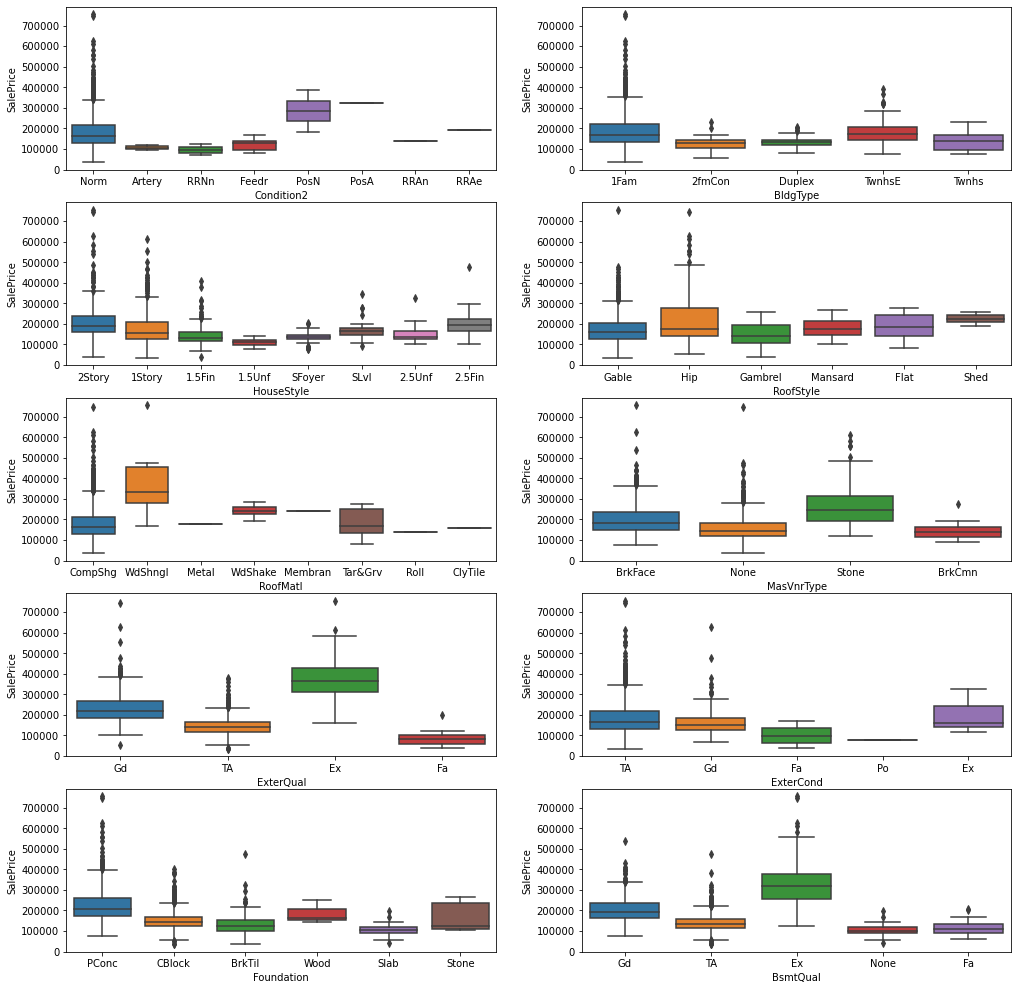

In [24]:
#plotting categorical variables
fig, axes = plt.subplots(5, 2, figsize = (7,7)) 

plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(ax=axes[0,0], data=train_data,x='Condition2',y='SalePrice',)
sns.boxplot(ax=axes[0,1], data=train_data,x='BldgType',y='SalePrice')
sns.boxplot(ax=axes[1,0], data=train_data,x='HouseStyle',y='SalePrice')
sns.boxplot(ax=axes[1,1], data=train_data,x='RoofStyle',y='SalePrice')
sns.boxplot(ax=axes[2,0], data=train_data,x='RoofMatl',y='SalePrice')
sns.boxplot(ax=axes[2,1], data=train_data,x='MasVnrType',y='SalePrice')
sns.boxplot(ax=axes[3,0], data=train_data,x='ExterQual',y='SalePrice')
sns.boxplot(ax=axes[3,1], data=train_data,x='ExterCond',y='SalePrice')
sns.boxplot(ax=axes[4,0], data=train_data,x='Foundation',y='SalePrice')
sns.boxplot(ax=axes[4,1], data=train_data,x='BsmtQual',y='SalePrice')

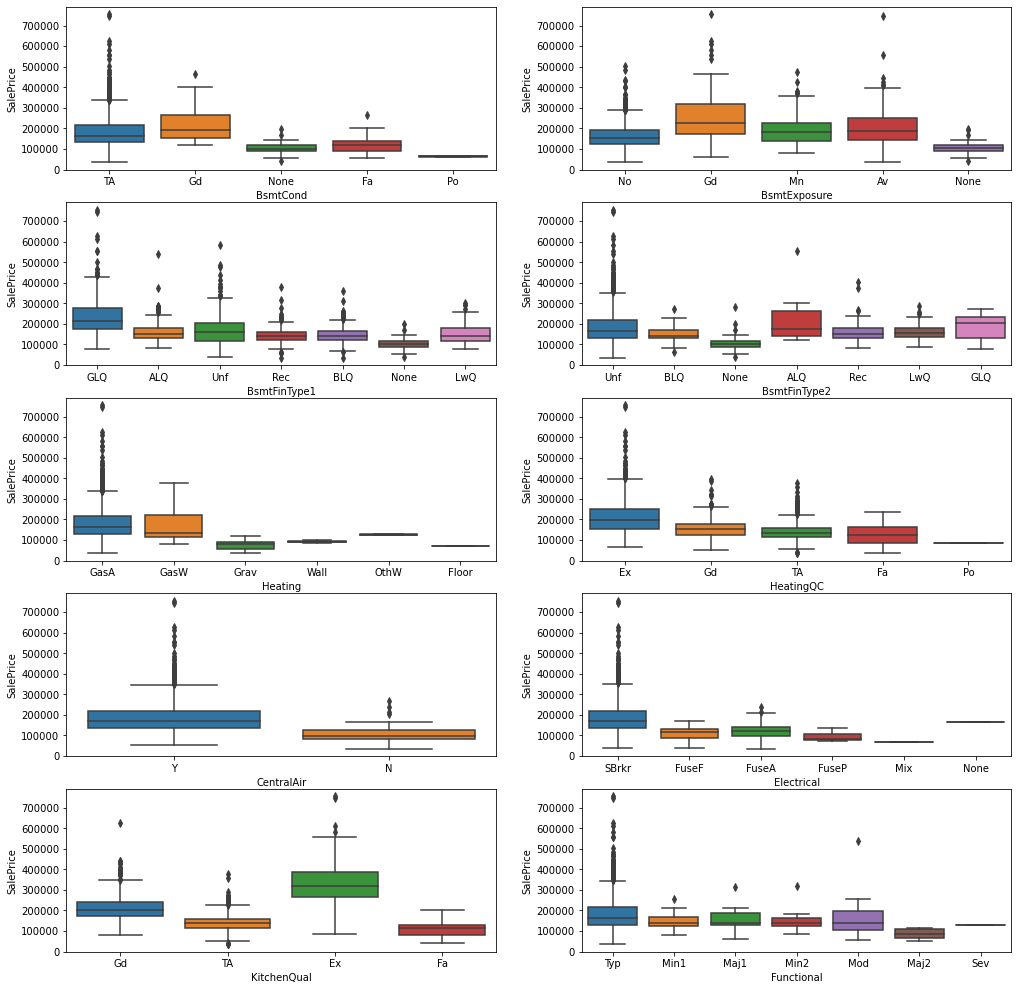

In [25]:
#plotting categorical variables
fig, axes = plt.subplots(5, 2, figsize = (7,7)) 

plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(ax=axes[0,0], data=train_data,x='BsmtCond',y='SalePrice',)
sns.boxplot(ax=axes[0,1], data=train_data,x='BsmtExposure',y='SalePrice')
sns.boxplot(ax=axes[1,0], data=train_data,x='BsmtFinType1',y='SalePrice')
sns.boxplot(ax=axes[1,1], data=train_data,x='BsmtFinType2',y='SalePrice')
sns.boxplot(ax=axes[2,0], data=train_data,x='Heating',y='SalePrice')
sns.boxplot(ax=axes[2,1], data=train_data,x='HeatingQC',y='SalePrice')
sns.boxplot(ax=axes[3,0], data=train_data,x='CentralAir',y='SalePrice')
sns.boxplot(ax=axes[3,1], data=train_data,x='Electrical',y='SalePrice')
sns.boxplot(ax=axes[4,0], data=train_data,x='KitchenQual',y='SalePrice')
sns.boxplot(ax=axes[4,1], data=train_data,x='Functional',y='SalePrice')

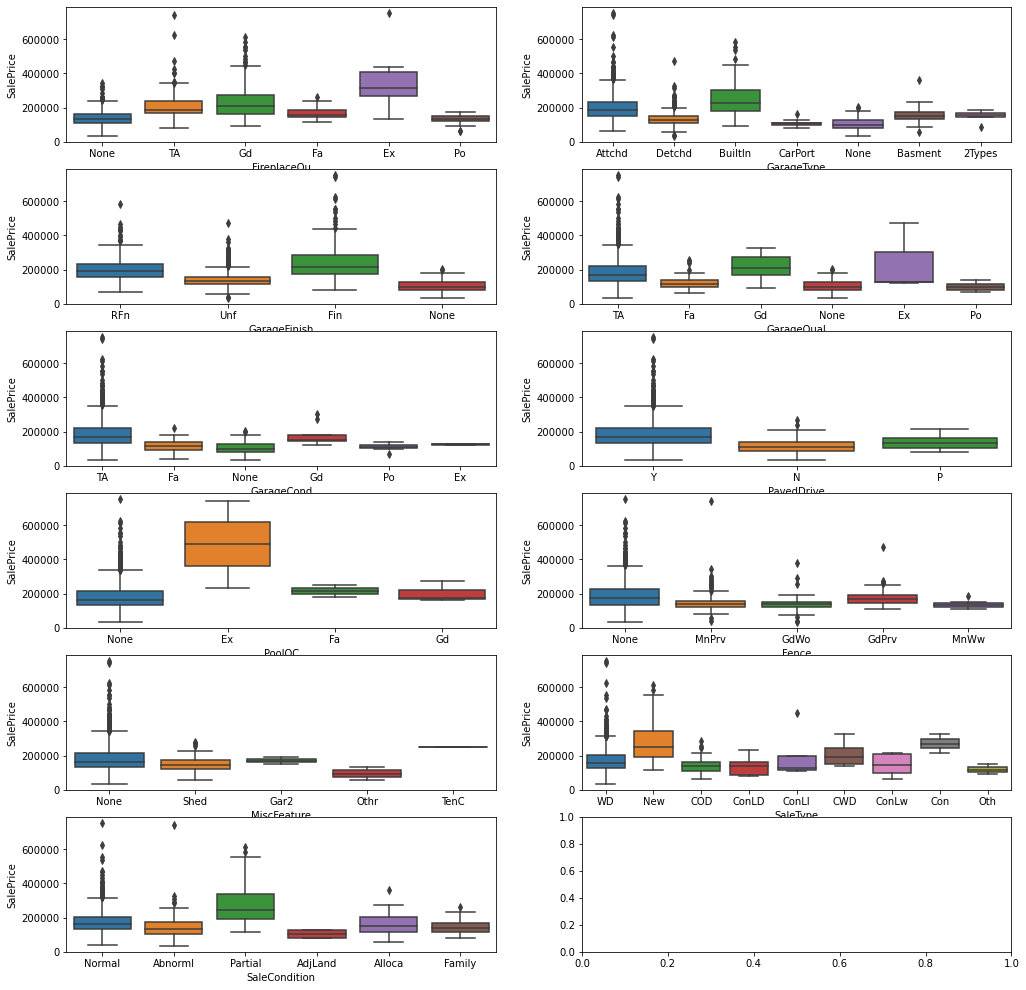

In [26]:
#plotting categorical variables
fig, axes = plt.subplots(6, 2, figsize = (7,7)) 

plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.boxplot(ax=axes[0,0], data=train_data,x='FireplaceQu',y='SalePrice',)
sns.boxplot(ax=axes[0,1], data=train_data,x='GarageType',y='SalePrice')
sns.boxplot(ax=axes[1,0], data=train_data,x='GarageFinish',y='SalePrice')
sns.boxplot(ax=axes[1,1], data=train_data,x='GarageQual',y='SalePrice')
sns.boxplot(ax=axes[2,0], data=train_data,x='GarageCond',y='SalePrice')
sns.boxplot(ax=axes[2,1], data=train_data,x='PavedDrive',y='SalePrice')
sns.boxplot(ax=axes[3,0], data=train_data,x='PoolQC',y='SalePrice')
sns.boxplot(ax=axes[3,1], data=train_data,x='Fence',y='SalePrice')
sns.boxplot(ax=axes[4,0], data=train_data,x='MiscFeature',y='SalePrice')
sns.boxplot(ax=axes[4,1], data=train_data,x='SaleType',y='SalePrice')
sns.boxplot(ax=axes[5,0], data=train_data,x='SaleCondition',y='SalePrice')

From the graphs above, the variables that seem mostly correlated with the sale price are: MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType'. 


In [27]:
catg_variables = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

I will map them to better explore their relationship to the target variable

In [28]:
#coping the original DF in order to remap the variables
df=train_data.copy()

In [29]:
#remapping the interesting categorical variables
df['MSZoning']=df['MSZoning'].map({'C (all)':1,'RM':2, 'RH':2, 'RL':3, 'FV':3})
df['Neighborhood']=df['Neighborhood'].map({'Mitchel':1,'OldTown':1, 'BrkSide':1, 'Sawyer':1, 'NAmes':1,'SawyerW':1,
                                          'IDOTRR':1, 'MeadowV':1,'Edwards':1,'NPkVill':1,  'SWISU':1,'BrDale':1,
                                          'Blueste':1,
                                        'Blmngtn':2, 'ClearCr':2, 'CollgCr':2, 'Crawfor':2, 'Gilbert':2, 'NWAmes':2,
                                          'Somerst':2,'Timber':2, 'Veenker':2, 'NoRidge':3, 'NridgHt':3, 'StoneBr':3})

df['Condition2']=df['Condition2'].map({'Artery':1,'RRNn':1,'Feedr':1, 'RRAn':1,'Norm':2, 'RRAe':2,'PosA':3, 'PosN':3})
df['MasVnrType']=df['MasVnrType'].map({'BrkFace':1, 'None':1, 'Stone':1, 'BrkCmn':1,'Stone':2})
df['ExterQual']=df['ExterQual'].map({'Fa':1,'TA':2,'Gd':3, 'Ex':4})
df['BsmtQual']=df['BsmtQual'].map({'TA':1,'None':1,'Fa':1,'Gd':2,'Ex':3,})
df['CentralAir']=df['CentralAir'].map({'N':1,'Y':2})
df['Electrical']=df['Electrical'].map({'FuseF':1, 'FuseA':1, 'FuseP':1, 'Mix':1, 'None':1,'SBrkr':2})
df['KitchenQual']=df['KitchenQual'].map({'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['SaleType']=df['SaleType'].map({'Oth':1, 'WD':2,'COD':2,'ConLD':2,'ConLI':2, 'ConLw':2,
                                   'CWD':3,'New':4, 'Con':4})

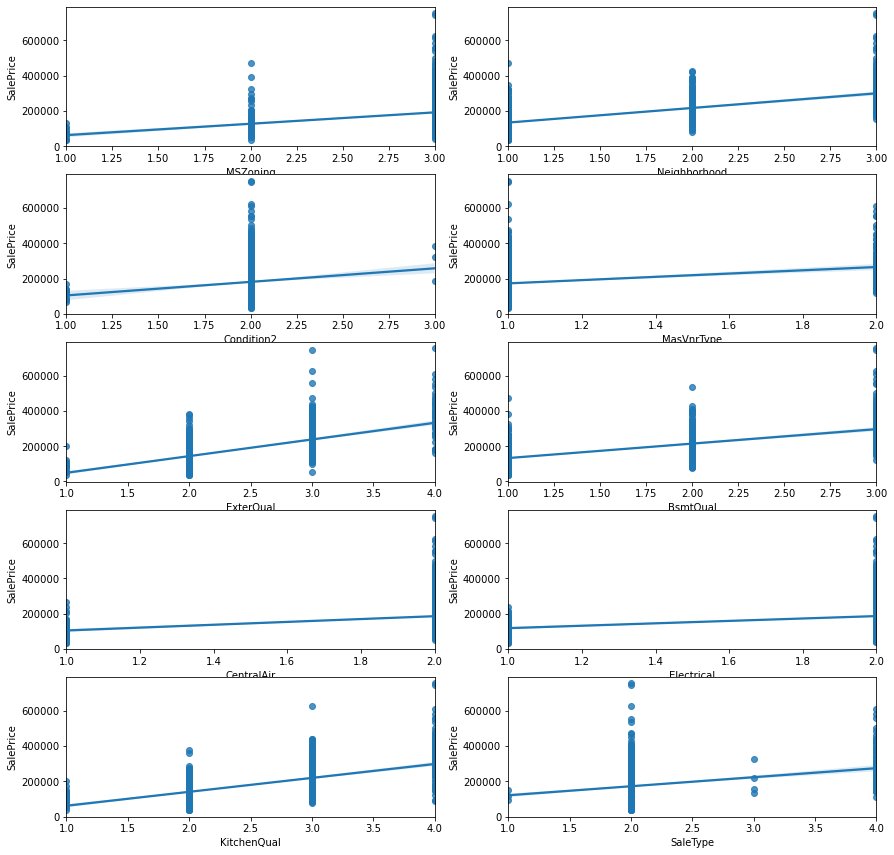

In [30]:
#plotting the variables using regression plots
fig, axes = plt.subplots(5, 2, figsize = (6,6)) 

plt.subplots_adjust(right=2)
plt.subplots_adjust(top=2)

sns.regplot(ax=axes[0,0], data=df,x='MSZoning',y='SalePrice',)
sns.regplot(ax=axes[0,1], data=df,x='Neighborhood',y='SalePrice')
sns.regplot(ax=axes[1,0], data=df,x='Condition2',y='SalePrice')
sns.regplot(ax=axes[1,1], data=df,x='MasVnrType',y='SalePrice')
sns.regplot(ax=axes[2,0], data=df,x='ExterQual',y='SalePrice')
sns.regplot(ax=axes[2,1], data=df,x='BsmtQual',y='SalePrice')
sns.regplot(ax=axes[3,0], data=df,x='CentralAir',y='SalePrice')
sns.regplot(ax=axes[3,1], data=df,x='Electrical',y='SalePrice')
sns.regplot(ax=axes[4,0], data=df,x='KitchenQual',y='SalePrice')
sns.regplot(ax=axes[4,1], data=df,x='SaleType',y='SalePrice')

plt.show()

## 5. Preprocessing

It is time to do the last arrangements before modelling.
First, as mentioned, I will log transform the target variable

In [31]:
#log transformation
Y_train=np.log(train_data['SalePrice'])

I will transform the categorical variables into dummies; to do so, I will merge the train and test sets and split them once the process is done.

In [32]:
# Split features and labels
train_labels = train_data['SalePrice'].reset_index(drop=True)
train_features = train_data.drop(['SalePrice'], axis=1)
test_features = test_data

# Combine train and test features in order to apply the feature transformation to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape

(2919, 80)

In [33]:
catg_variables = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
dummies=pd.get_dummies(all_features[catg_variables])
not_dummies=all_features[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       'GrLivArea', 'FullBath', 'GarageCars']]
all_features=pd.concat([not_dummies,dummies], axis=1, ignore_index=False)

In [34]:
all_features.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,GrLivArea,FullBath,GarageCars,MSZoning_C (all),MSZoning_FV,MSZoning_None,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_None,SaleType_Oth,SaleType_WD
0,7,2003,2003,856.0,1710,2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,1976,1976,1262.0,1262,2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,7,2001,2002,920.0,1786,2,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,1915,1970,756.0,1717,1,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,2000,2000,1145.0,2198,2,3.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#splitting the dataset again
X_train = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]
X_train.shape, train_labels.shape, X_test.shape

((1460, 82), (1460,), (1459, 82))

# 5. Modelling

Now that evrything is set, I will try different regression algorithms:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regression
* Random Forest Regression
* XGBoost Regression

Five cross-validation folders will be used. 

In [36]:
score_calc = 'neg_mean_squared_error'

In [37]:
#Linear Regression
LR = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_search= GridSearchCV(LR, parameters, cv=5, verbose=1 , scoring = score_calc)
grid_search.fit(X_train, Y_train)

LR_score=grid_search.best_score_
LR_params=grid_search.best_params_
print(LR_score)
print(LR_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-0.024821620502910306
{'copy_X': True, 'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


In [38]:
#Ridge Regression
RR = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_search= GridSearchCV(RR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

RR_score=grid_search.best_score_
RR_params=grid_search.best_params_
print(RR_score)
print(RR_params)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.6s


-0.023839047569962045
{'alpha': 1, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    3.4s finished


In [39]:
#Lasso Regression
LaR = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 'normalize':[True,False], 'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_search= GridSearchCV(LaR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

LaR_score=grid_search.best_score_
LaR_params=grid_search.best_params_
print(LaR_score)
print(LaR_params)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s


-0.024551096273114727
{'alpha': 0.001, 'normalize': False, 'tol': 1e-06}


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    1.7s finished


In [40]:
#DecisionTree Regression
DTR = DecisionTreeRegressor()
parameters = { 'max_depth' : [7,8,9,10] , 'max_features' : [11,12,13,14] ,
               'max_leaf_nodes' : [None, 12,15,18,20] ,'min_samples_split' : [20,25,30],
                'presort': [False,True] }
grid_search= GridSearchCV(DTR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

DTR_score=grid_search.best_score_
DTR_params=grid_search.best_params_
print(DTR_score)
print(DTR_params)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s


-0.03934172526717449
{'max_depth': 7, 'max_features': 14, 'max_leaf_nodes': None, 'min_samples_split': 20, 'presort': False}


[Parallel(n_jobs=-1)]: Done 2380 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:   10.4s finished
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:327: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [41]:
#RandomForest Regression
RFR=RandomForestRegressor()
parameters = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [70,100] }
grid_search= GridSearchCV(RFR, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

RFR_score=grid_search.best_score_
RFR_params=grid_search.best_params_
print(RFR_score)
print(RFR_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   11.1s finished


-0.022610781206606343
{'min_samples_split': 3, 'n_estimators': 70}


In [42]:
#XGBoost Regression
XGB=XGBRegressor()
parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
grid_search= GridSearchCV(XGB, parameters, cv=5, verbose=1 , scoring = score_calc, n_jobs = -1)
grid_search.fit(X_train, Y_train)

XGB_score=grid_search.best_score_
XGB_params=grid_search.best_params_
print(XGB_score)
print(XGB_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  2.0min finished


[17:02:16] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:16] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:17] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
-0.019305770482755134
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


Let's compare the models with each other

In [43]:
list_scores = [LR_score, RR_score, LaR_score, DTR_score,
               RFR_score, XGB_score]
list_regressors = ['Linear','Ridge','Lasso','DT','RF','XGB']

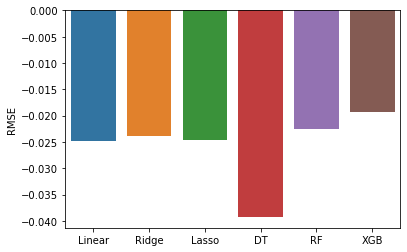

In [44]:
fig, ax = plt.subplots()
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()

XGBoost is the one that performs better and for this reason i will use it to make the predictions.

In [45]:
XGB_tuned=XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth=5, 
                  min_child_weight= 4, n_estimators=500, nthread=4, objective= 'reg:linear',
                  silent=1, subsample=0.7)

XGB_tuned.fit(X_train,Y_train)

[17:02:19] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[17:02:19] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:02:20] WARNING: ../src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
Y_hat = XGB_tuned.predict(X_test).astype(float)
Y_hat

array([11.67997646, 11.93177032, 12.05281162, ..., 11.93165779,
       11.61259937, 12.31444931])

Text(0.5, 0, 'Xgboost Feature Importance')

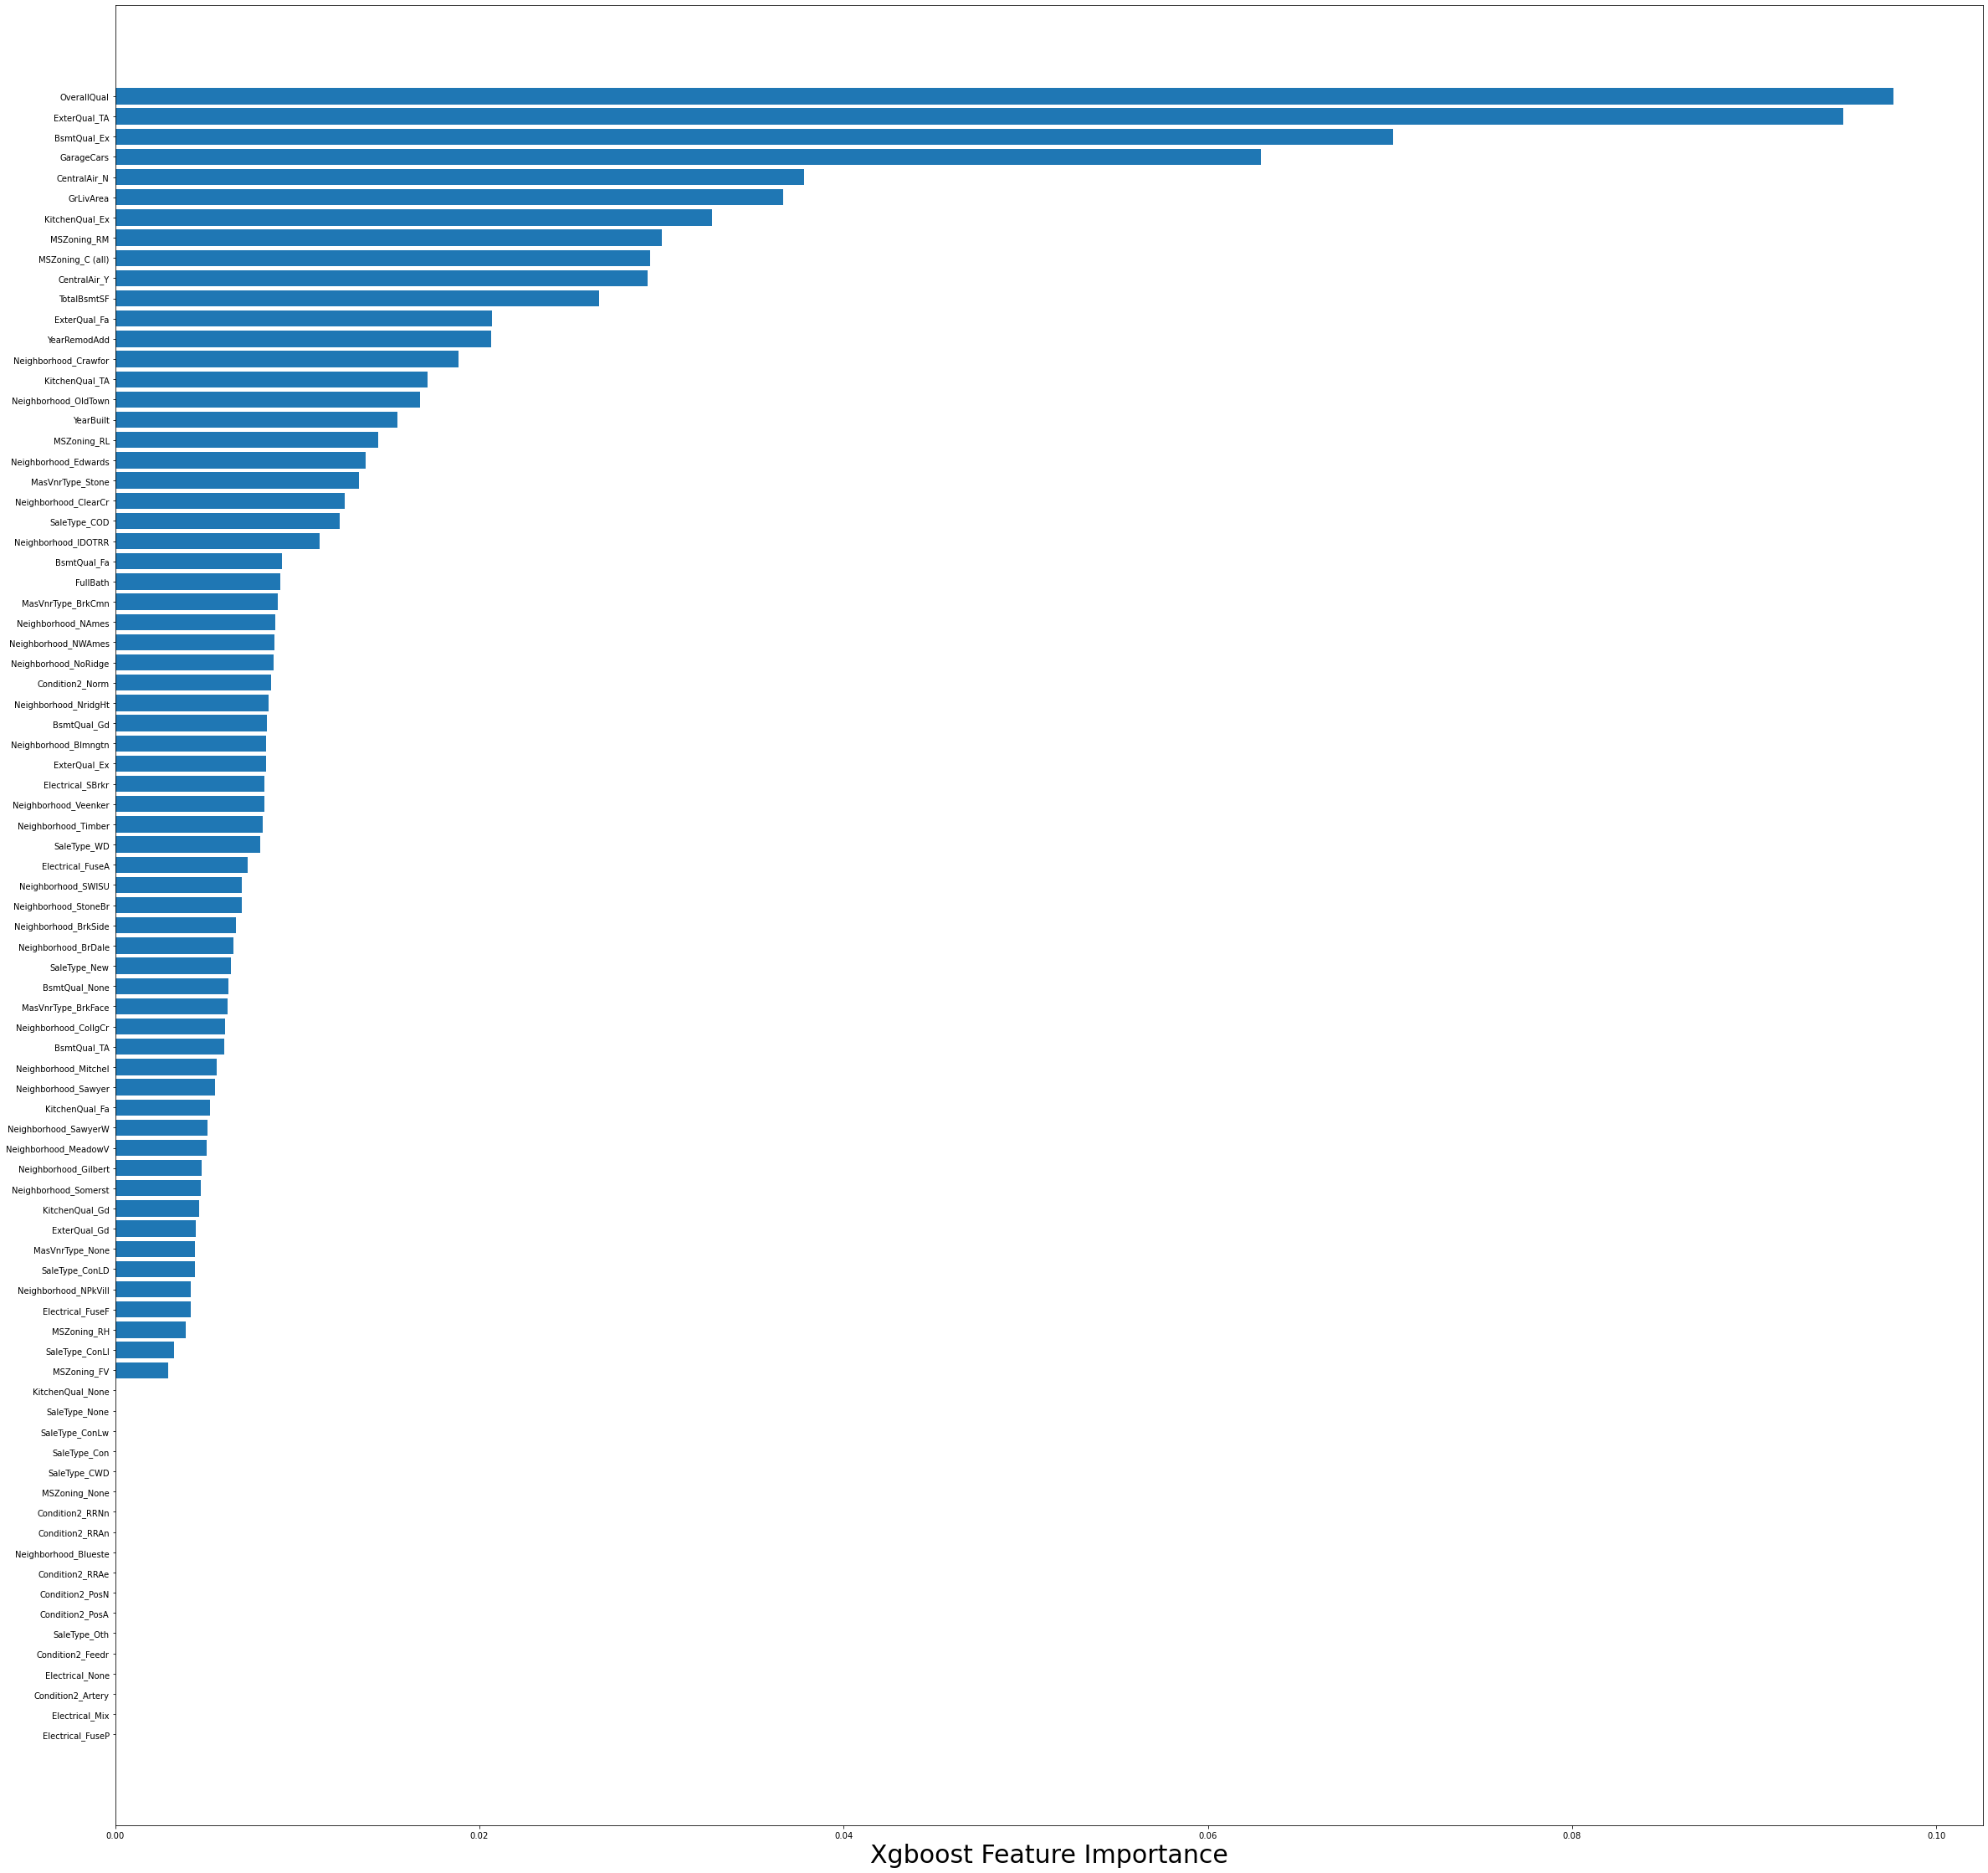

In [47]:
sorted_idx = XGB_tuned.feature_importances_.argsort()
plt.figure(figsize=(40,40))
#plt.rcParams['font.size'] = '30'
plt.barh(X_train.columns[sorted_idx], XGB_tuned.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance",fontsize=30)

In [48]:
XGB_submission = {'Id': test_data.Id, 'SalePrice': np.exp(Y_hat)}
submission_XGB = pd.DataFrame(data=XGB_submission )
submission_XGB.to_csv('submission_XGB.csv', index=False)